In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-4-77102821f70a>:33: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='upper left')


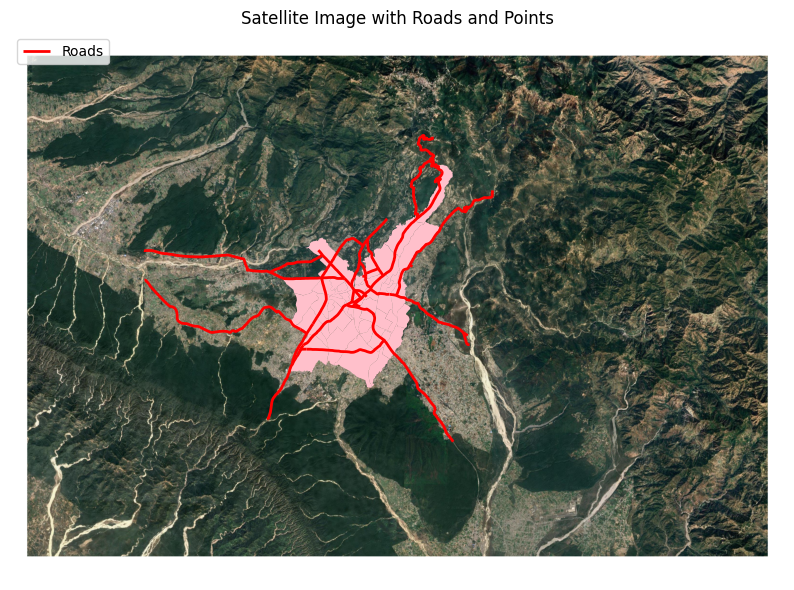

In [4]:
!pip install rasterio
import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

class MapOverlay:
    def __init__(self, satellite_image_path, road_shapefile_path, point_shapefile_path):
        # Initialize with file paths
        self.satellite_image_path = satellite_image_path
        self.road_shapefile_path = road_shapefile_path
        self.point_shapefile_path = point_shapefile_path

    def load_data(self):
        """Load raster and vector data."""
        self.satellite_image = rasterio.open(self.satellite_image_path)
        self.road_vector = gpd.read_file(self.road_shapefile_path)
        self.point_vector = gpd.read_file(self.point_shapefile_path)

    def overlay(self):
        """Plot the satellite image with roads and points."""
        fig, ax = plt.subplots(figsize=(10, 10))

        # Show satellite image
        show(self.satellite_image, ax=ax)

        # Overlay roads and points
        self.road_vector.plot(ax=ax, color='red', linewidth=2, label='Roads')
        self.point_vector.plot(ax=ax, color='pink', markersize=50, label='Points')

        # Add title and legend
        ax.set_title("Satellite Image with Roads and Points")
        ax.legend(loc='upper left')

        plt.axis("off")
        plt.show()

# File paths (update with actual paths)
satellite_image_path = "/content/drive/MyDrive/uttarakhand/uk89.tif"
road_shapefile_path = "/content/drive/MyDrive/uttarakhand/road1.shp"
point_shapefile_path = "/content/drive/MyDrive/uttarakhand/Ward1.shp"

# Create MapOverlay instance and load data
map_overlay = MapOverlay(satellite_image_path, road_shapefile_path, point_shapefile_path)
map_overlay.load_data()

# Display the overlayed map
map_overlay.overlay()
